<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

**! Ссылка на датасет в Google диск:** https://drive.google.com/file/d/1ZgsF4npR6K5xadD5uBKhGh18sG1pgvWi/view?usp=sharing

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import matplotlib.lines as lines

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [5]:
df_hh = pd.read_csv('data\dst-3.0_16_1_hh_database.csv', sep=';')
print(df_hh.shape)

(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [6]:
df_hh.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [7]:
df_hh.info()

null_data = df_hh.isnull().sum()
cols_with_null = null_data[null_data > 0].index
display(null_data[cols_with_null])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [8]:
df_hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
def obrazovach(stroka):
    tmp = stroka.split()
    if tmp[1].find('образование') >= 0:
        razumenie = tmp[0]
    else:
        razumenie = tmp[0] + ' ' + tmp[1]
    return razumenie

df_hh['Образование'] = df_hh['Образование и ВУЗ'].apply(obrazovach)
df_hh['Образование'] = df_hh['Образование'].astype('category')

df_hh = df_hh.drop(columns='Образование и ВУЗ')

df_hh['Образование'].value_counts()

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
df_hh['Пол'] = df_hh['Пол, возраст'].apply(lambda x: x[0])
df_hh['Возраст'] = df_hh['Пол, возраст'].apply(lambda x: int(x.split(' ')[3]))

df_hh = df_hh.drop(columns='Пол, возраст')

print(df_hh['Пол'].value_counts())
print(df_hh[df_hh['Пол'] == 'Ж']['Пол'].count() / df_hh['Пол'].count() * 100)

print(df_hh['Возраст'].mean())

М    36211
Ж     8533
Name: Пол, dtype: int64
19.070713391739673
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
def level(infa):
    if pd.isna(infa) or infa == "Не указано":
        return np.NaN
    else:
        expa = 0
        tmp = infa.split(' ')[2:6]
        if tmp[1].find('месяц') >= 0:
            expa = int(tmp[0])
        else:
            expa = int(tmp[0]) * 12
            if tmp[3].find('месяц') >= 0:
                expa = expa + int(tmp[2])
        return expa

df_hh['Опыт работы (месяц)'] = df_hh['Опыт работы'].apply(level)
df_hh = df_hh.drop(columns='Опыт работы')

print(df_hh['Опыт работы (месяц)'].median())

100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
def iz_kakogo_sela(stroka):
    tmp = stroka.split(' , ')
    if tmp[0] == 'Москва' or tmp[0] == 'Санкт-Петербург':
        return tmp[0]
    elif tmp[0] in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
df_hh['Город'] = df_hh['Город, переезд, командировки'].apply(iz_kakogo_sela)
df_hh['Город'] = df_hh['Город'].astype('category')

spb_prc = df_hh[df_hh['Город'] == 'Санкт-Петербург']['Город'].count() / df_hh['Город'].count() * 100
print (spb_prc)

def reloc(stroka):
    tmp = stroka.split(' , ')
    dvizh = {'perzd': False, 'comka': False}
    for el in tmp:
        if el.find(' перее') >= 0:
            if el.find('не ') < 0:
                dvizh['perzd'] = True
        if el.find(' командировк') >= 0:
            if el.find('не ') < 0:
                dvizh['comka'] = True
    return dvizh    
    
temp = df_hh['Город, переезд, командировки'].apply(reloc)
df_hh['Готовность к переезду'] = temp.apply(lambda x: x['perzd'])
df_hh['Готовность к командировкам'] = temp.apply(lambda x: x['comka'])

df_hh = df_hh.drop(columns='Город, переезд, командировки')

dvizh_prc = (df_hh['Готовность к переезду'] & df_hh['Готовность к командировкам']).sum() / df_hh['Готовность к переезду'].count() * 100
print (dvizh_prc)

11.033881637761487
31.86572501340962


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [13]:
def getwt(stroka, work_tp = list()):
    tmp = stroka.split(', ')
    wkdict = dict()
    for el in work_tp:
        if el in tmp:
            wkdict[el] = True
        else:
            wkdict[el] = False
    return wkdict

wklist = ['частичная занятость', 'проектная работа', 'полная занятость', 'стажировка', 'волонтерство']
temp = df_hh['Занятость'].apply(getwt, work_tp = wklist)
for el in wklist:
    df_hh[el] = temp.apply(lambda x: x[el])
df_hh = df_hh.drop(columns='Занятость')

grlist = ['гибкий график', 'полный день', 'сменный график', 'вахтовый метод', 'удаленная работа']
temp = df_hh['График'].apply(getwt, work_tp = grlist)
for el in grlist:
    df_hh[el] = temp.apply(lambda x: x[el])
df_hh = df_hh.drop(columns='График')

print ((df_hh['проектная работа'] & df_hh['волонтерство']).sum())
print ((df_hh['вахтовый метод'] & df_hh['гибкий график']).sum())

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [14]:
#1
df_er = pd.read_csv('data\ExchangeRates.csv', sep=',')
df_er = df_er.drop(['per', 'time', 'vol'], axis='columns')
df_er['date'] = pd.to_datetime(df_er['date'], dayfirst=True)
df_er['date'] = df_er['date'].dt.date

df_hh['Обновление резюме'] = pd.to_datetime(df_hh['Обновление резюме'], dayfirst=True)
df_hh['Обновление резюме'] = df_hh['Обновление резюме'].dt.date

#2
val_iso = {'руб.': 'RUB', 'KZT': 'KZT', 'USD': 'USD', 'бел.руб.': 'BYN', 'EUR': 'EUR', 'грн.': 'UAH', 'сум': 'UZS', 'KGS': 'KGS', 'AZN': 'AZN'}
df_hh['ЗП сумма'] = df_hh['ЗП'].apply(lambda x: int(x.split(' ')[0]))
temp = df_hh['ЗП'].apply(lambda x: x.split(' ')[1])
df_hh['ЗП валюта'] = temp.apply(lambda x: val_iso[x])


#3
temp = df_hh.loc[:,['ЗП сумма', 'ЗП валюта', 'Обновление резюме']]
temp = temp.merge(df_er, how='left', left_on=['ЗП валюта', 'Обновление резюме'], right_on=['currency', 'date'])
temp = temp.drop(columns=['currency', 'date'])
temp = temp.fillna(1)

#4
df_hh['ЗП (руб)'] = temp['ЗП сумма'] * temp['close'] / temp['proportion']
df_hh = df_hh.drop(columns=['ЗП', 'ЗП сумма', 'ЗП валюта'])

display(df_hh['ЗП (руб)'].median())

59019.0

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

0    30
Name: Возраст, dtype: int64

count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

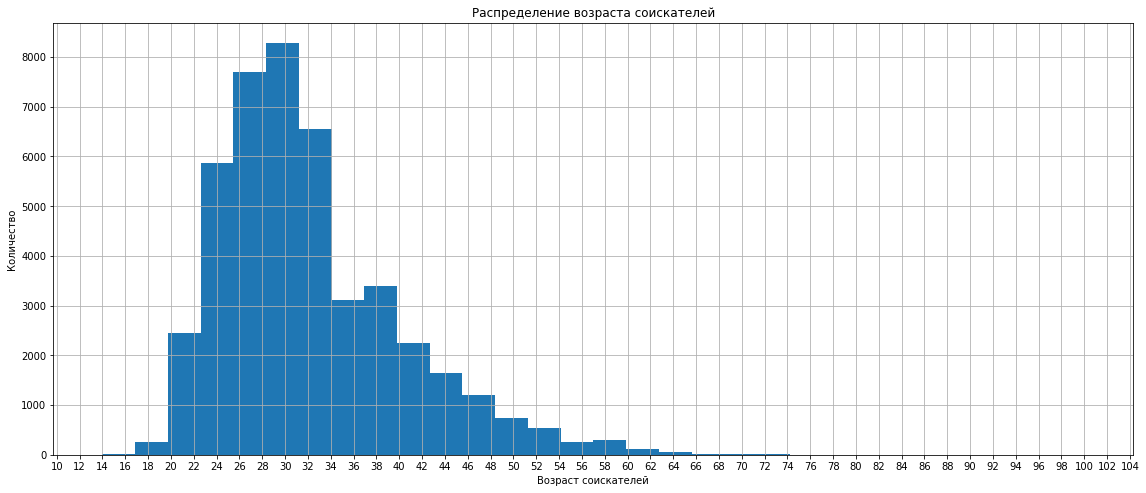

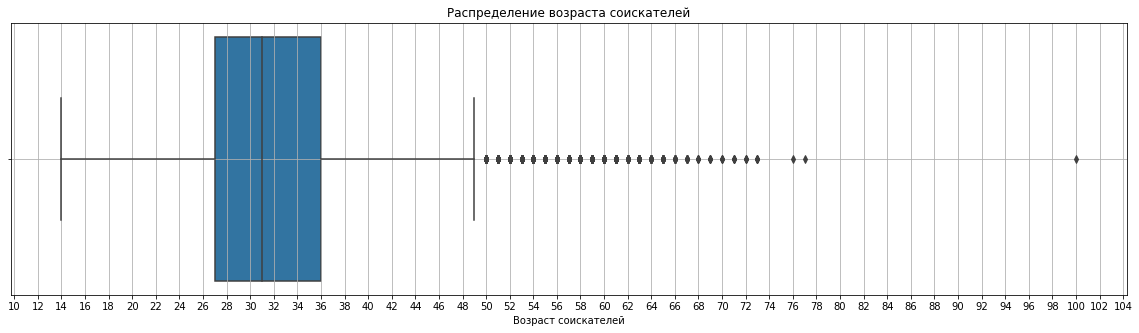

In [15]:
display(df_hh['Возраст'].mode())
display(df_hh['Возраст'].describe())
fig = plt.figure(figsize=(15, 6))
axes = fig.add_axes([0, 0, 1, 1])

axes.xaxis.set_major_locator(ticker.MultipleLocator(2))
axes.set_ylabel('Количество')
axes.set_xlabel('Возраст соискателей')
axes.set_title('Распределение возраста соискателей')
axes.grid()

axes.hist(
    x=df_hh['Возраст'], bins=30);

fig = plt.figure(figsize=(20, 5))
boxplot = sns.boxplot(
    data=df_hh,
    #y='',
    x='Возраст',
    #order=['', ''],
    orient='h',
    width=0.9
)
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(2))
boxplot.set_title('Распределение возраста соискателей');
boxplot.set_xlabel('Возраст соискателей');
boxplot.set_ylabel('');
boxplot.grid()


В целом распределение возраста выглядит похожим на правду,
мода распределения равна 30 лет, 
минимальное значение возраста 14 максимальное 100, 
возраст большинства соискателей находится в диапазоне примерно от 25 до 35 лет
в качестве аномалий можно выделить крайние значения в 100 и 14 лет (при соблюдении некоторых условий можно работать с 14 лет, но в текущем случае данные некорректны, так как стаж превышает возраст)

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

0    81.0
Name: Опыт работы (месяц), dtype: float64

count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

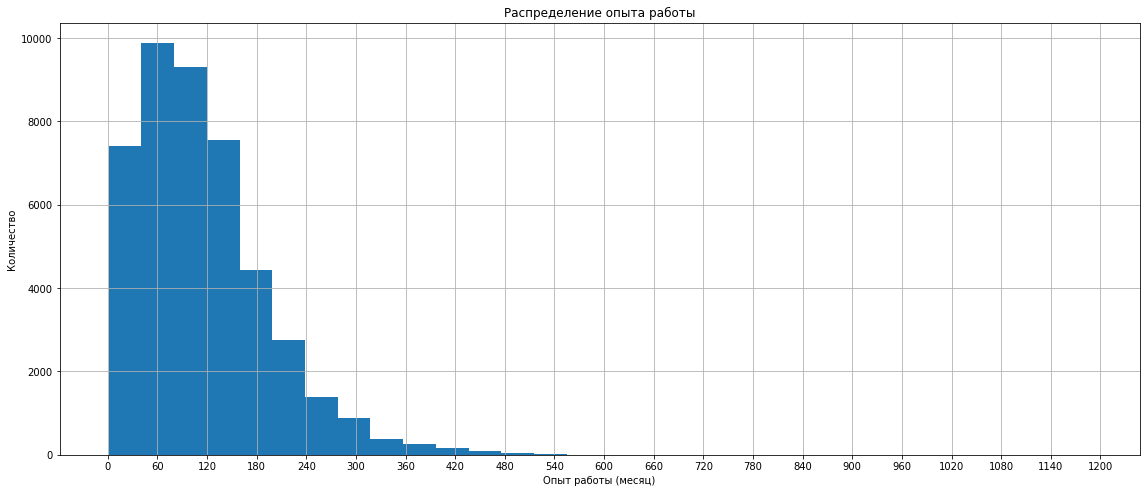

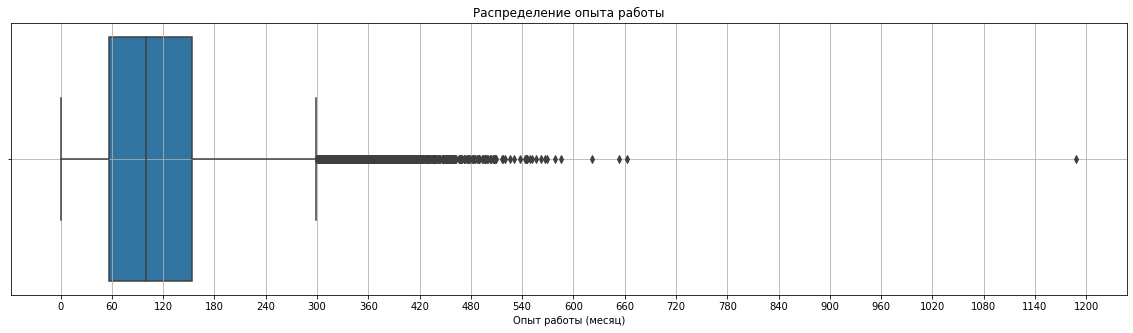

In [16]:
display(df_hh['Опыт работы (месяц)'].mode())
display(df_hh['Опыт работы (месяц)'].describe())
fig = plt.figure(figsize=(15, 6))
axes = fig.add_axes([0, 0, 1, 1])

axes.xaxis.set_major_locator(ticker.MultipleLocator(60))
axes.set_ylabel('Количество')
axes.set_xlabel('Опыт работы (месяц)')
axes.set_title('Распределение опыта работы')
axes.grid()
axes.hist(
    x=df_hh['Опыт работы (месяц)'], bins=30);

fig = plt.figure(figsize=(20, 5))
boxplot = sns.boxplot(
    data=df_hh,
    #y='',
    x='Опыт работы (месяц)',
    #order=['', ''],
    orient='h',
    width=0.9
)
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(60))
boxplot.set_title('Распределение опыта работы');
boxplot.set_xlabel('Опыт работы (месяц)');
boxplot.set_ylabel('');
boxplot.grid()



Мода распределения опыта работы приходится на 81 мес (около 7 лет, что в принципе сходится с распределением возраста).
Минимальный опыт 0 (без опыта, что логично), максимальный 1188 мес (99 лет, как-то слишком много).
Опыт работы большинства соискателей находится в диапазоне примерно от 60 до 160 мес (от 5 до 13 лет).
В качестве аномалии следует выделить значение в 1188 мес (99 лет) Нужно прожить более 110 лет, чтобы столько получить, да еще и искать работу, чтобы попасть в эту статистику (кстати соискателей такого возраста нет). Ну или всегда работать на двух работах, чтобы каждый день приносил два опыта вместо одного). 

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


0    50000.0
Name: ЗП (руб), dtype: float64

count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64


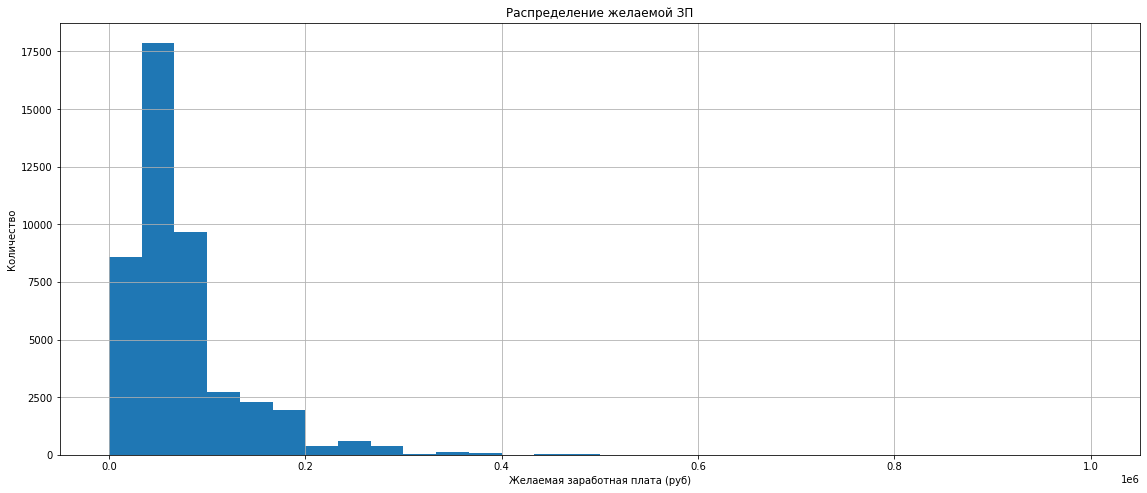

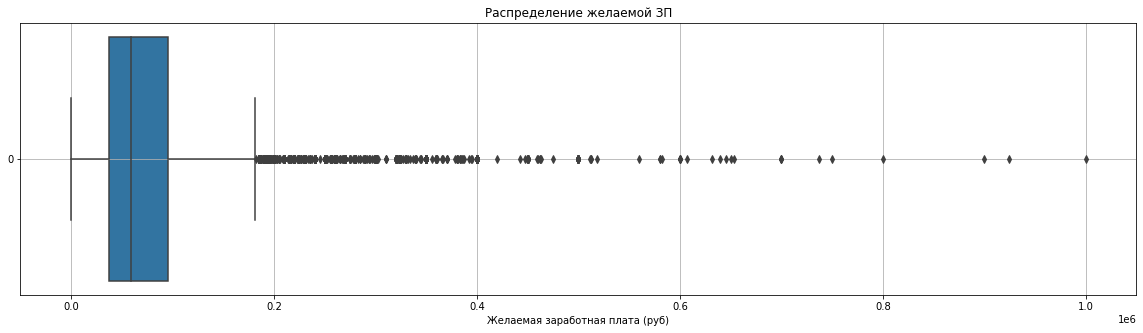

In [17]:
display(df_hh['ЗП (руб)'].mode())
print(df_hh['ЗП (руб)'].describe())

temp = df_hh[df_hh['ЗП (руб)'] <= 1000000]['ЗП (руб)']

fig = plt.figure(figsize=(15, 6))
axes = fig.add_axes([0, 0, 1, 1])
#axes.xaxis.set_major_locator(ticker.MultipleLocator(10000))
axes.set_ylabel('Количество')
axes.set_xlabel('Желаемая заработная плата (руб)')
axes.set_title('Распределение желаемой ЗП')
axes.grid()
axes.hist(
    x=temp, bins=30);

fig = plt.figure(figsize=(20, 5))
boxplot = sns.boxplot(
    data=temp,
    #y='',
    #x='ЗП (руб)',
    #order=['', ''],
    orient='h',
    width=0.9
)
#boxplot.xaxis.set_major_locator(ticker.MultipleLocator(10000))
boxplot.set_title('Распределение желаемой ЗП');
boxplot.set_xlabel('Желаемая заработная плата (руб)');
boxplot.set_ylabel('');
boxplot.grid()

Пришлось обрезать график на 1 млн. руб иначе было совсем некрасиво.
Большинство желаемых ЗП в диапазоне примерно от 40 до 100 тыс. руб.
Минимальное значение 1 руб., максимальное 24304876 руб., мода 50000 руб.
Учитывая что в начальных данных встречались ЗП в USD, то большие суммы могут быть желаемой ЗП за год.
Да и вообще человек в праве желать сколько угодно, так что аномалий нет)

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

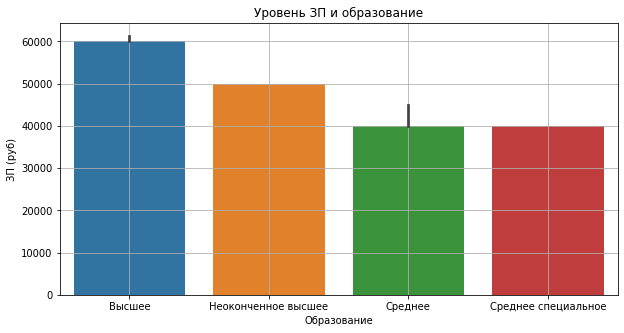

In [124]:
temp = df_hh[df_hh['ЗП (руб)'] < 1000000]

fig = plt.figure(figsize=(10, 5))

barplot = sns.barplot(
    data=temp,
    x='Образование',
    y='ЗП (руб)',
    estimator=np.median
)
barplot.set_title('Уровень ЗП и образование');
barplot.grid()

Максимальный уровень оплаты у соискателей с высшем образованием, со средним и средним специальным уровень оплаты минимальный. Уровень образования при прогнозировании ЗП несомненно важен.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

C:\Users\user\AppData\Local\Temp\ipykernel_5404\4032028051.py:12: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  display(temp.groupby('Город').max()['ЗП (руб)'])


Город
Москва              900000.0
Санкт-Петербург     645171.0
город-миллионник    511681.6
другие              923983.0
Name: ЗП (руб), dtype: float64

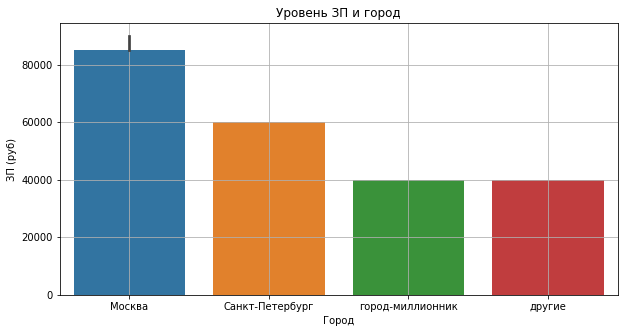

In [69]:
fig = plt.figure(figsize=(10, 5))

barplot = sns.barplot(
    data=temp,
    x='Город',
    y='ЗП (руб)',
    estimator=np.median
)
barplot.set_title('Уровень ЗП и город')
barplot.grid()

display(temp.groupby('Город').max()['ЗП (руб)'])

В Москве самые большие зарплаты и размах, в Петербурге поменьше, в остальной части России меньше всего и примерно на одном уровне. Город важен при прогнозировании ЗП

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

65535.0

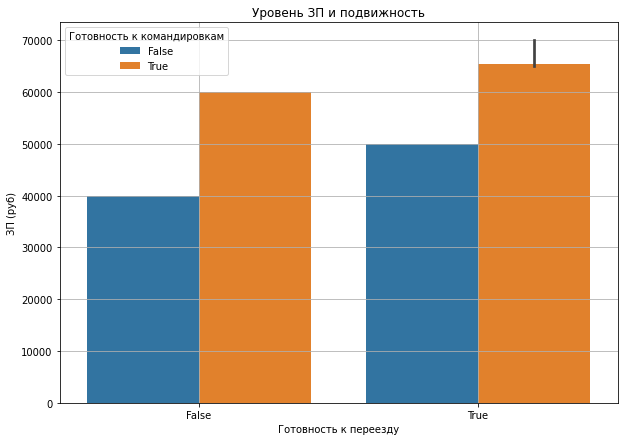

In [77]:
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=temp,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    estimator=np.median
)
barplot.set_title('Уровень ЗП и подвижность')
barplot.grid()

display(temp[temp['Готовность к переезду'] & temp['Готовность к командировкам']]['ЗП (руб)'].median())

Готовность к переезду повышает уровень ЗП, но гораздо важнее готовность к командировкам

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

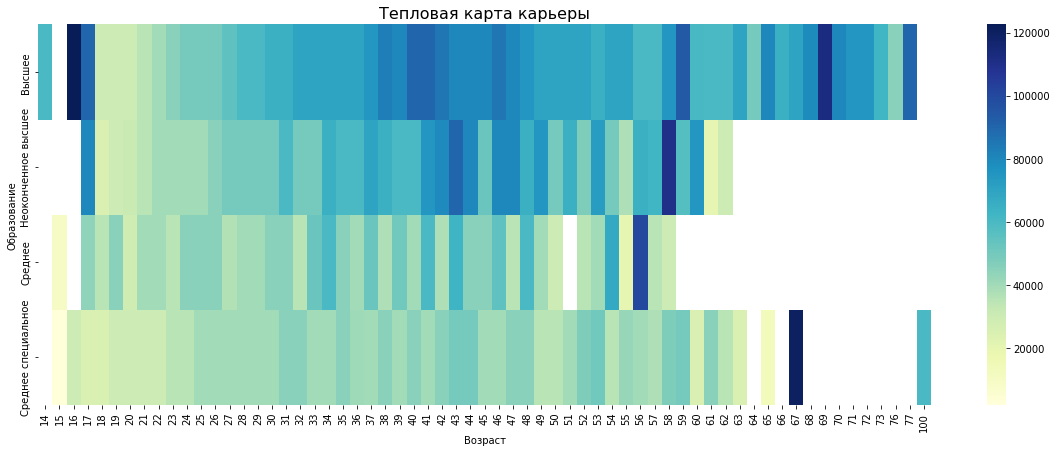

In [83]:
pivot = temp.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
    aggfunc=np.median
)
fig = plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта карьеры', fontsize=16);

С высшим образованием зарплата со временем растет и такие соискатели продолжают работать в преклонном возрасте (или даже дольше живут). Учение - свет.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

7

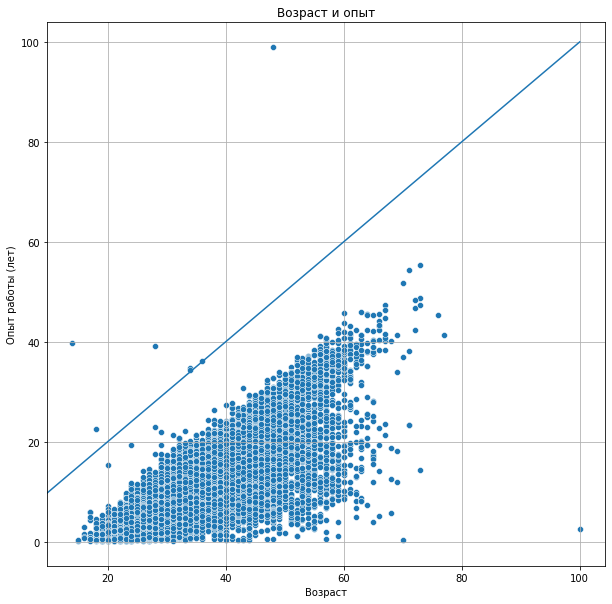

In [122]:
temp = df_hh.loc[:,['Возраст', 'Опыт работы (месяц)']]
temp['Опыт работы (лет)'] = temp['Опыт работы (месяц)'] / 12

fig = plt.figure(figsize=(10, 10))
sctplt = sns.scatterplot(data=temp, x="Возраст", y="Опыт работы (лет)")
sctplt.grid()
sctplt.set_title('Возраст и опыт')
line = lines.Line2D([0, 100], [0, 100])
sctplt.add_line(line)

display(temp[temp['Опыт работы (лет)'] > temp['Возраст']]['Опыт работы (лет)'].count())

В данных явно присутствуют аномалии

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


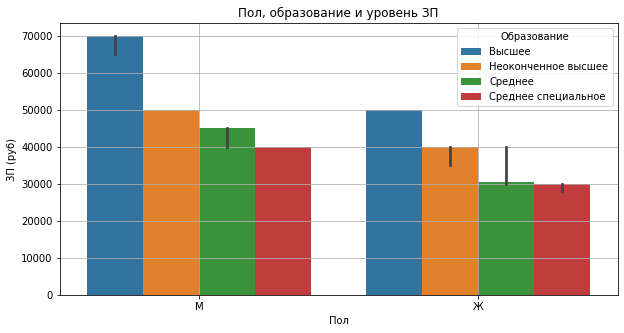

In [125]:
temp = df_hh[df_hh['ЗП (руб)'] < 1000000]

fig = plt.figure(figsize=(10, 5))

barplot = sns.barplot(
    data=temp,
    x='Пол',
    y='ЗП (руб)',
    estimator=np.median,
    hue='Образование'
)
barplot.set_title('Пол, образование и уровень ЗП');
barplot.grid()

При одинаковом уровне образования женщины претендуют на меньший уровень оплаты труда чем мужчины.

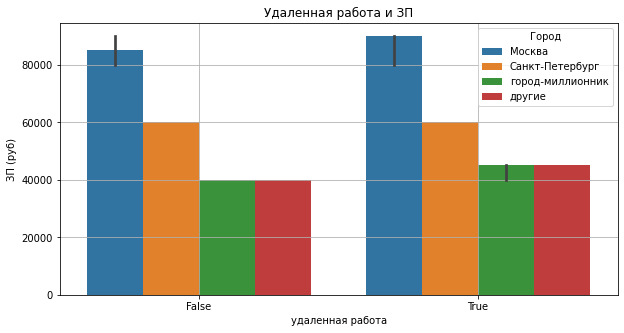

In [131]:
fig = plt.figure(figsize=(10, 5))

barplot = sns.barplot(
    data=temp,
    x='удаленная работа',
    y='ЗП (руб)',
    hue='Город',
    estimator=np.median
)
barplot.set_title('Удаленная работа и ЗП')
barplot.grid()


Если вы не Петербуржец и способны работать удаленно, то можно зарабатывать больше чем в офисе

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [139]:
mask = df_hh.duplicated()
data = df_hh[mask]
df_hh = df_hh.drop_duplicates()
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44583 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Ищет работу на должность:        44583 non-null  object  
 1   Последнее/нынешнее место работы  44582 non-null  object  
 2   Последняя/нынешняя должность     44581 non-null  object  
 3   Обновление резюме                44583 non-null  object  
 4   Авто                             44583 non-null  object  
 5   Образование                      44583 non-null  category
 6   Пол                              44583 non-null  object  
 7   Возраст                          44583 non-null  int64   
 8   Опыт работы (месяц)              44415 non-null  float64 
 9   Город                            44583 non-null  category
 10  Готовность к переезду            44583 non-null  bool    
 11  Готовность к командировкам       44583 non-null  bool    
 12  част

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [140]:
df_hh.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
частичная занятость                  0
проектная работа                     0
полная занятость                     0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
вахтовый метод                       0
удаленная работа                     0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [145]:
df_hh.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], inplace=True)
df_hh= df_hh.fillna( {'Опыт работы (месяц)':df_hh['Опыт работы (месяц)'].median()})
df_hh['Опыт работы (месяц)'].mean()

114.35777573405711

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [153]:
mask = df_hh[(df_hh['ЗП (руб)'] > 1000000) | (df_hh['ЗП (руб)'] < 1000)].index
df_hh.drop(mask, axis=0, inplace=True)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [156]:
mask = df_hh[(df_hh['Опыт работы (месяц)'] / 12) > df_hh['Возраст']].index
df_hh.drop(mask, axis=0, inplace=True)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,полная занятость,стажировка,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,False,False,False,False,True,False,True,False,True,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,True,False,False,False,True,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,False,True,True,False,False,True,60000.0


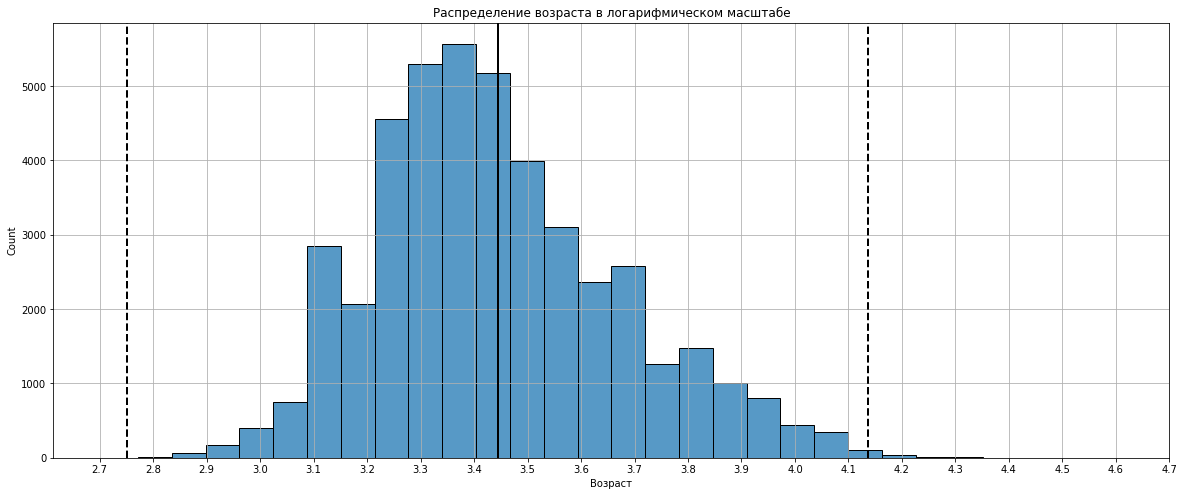

In [177]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):

    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(df_hh, 'Возраст', log_scale=True, left=3, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
log_age = np.log(df_hh['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
histplot.grid()
histplot.set_title('Распределение возраста в логарифмическом масштабе');

display(outliers)

Распределение ассиметрично вправо в сторону молодежи. В категорию выбросов попали соискатели младше 16 и старше 80 лет.